#Predicting wheather the customer will subcribe to term deposit if contacted by agent or not 

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(15,8)})
import warnings
warnings.filterwarnings('ignore')

>Data collection 

In [6]:
data=pd.read_csv("bank.csv",sep=';')

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.isnull().sum() 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

>Exploratory data analysis

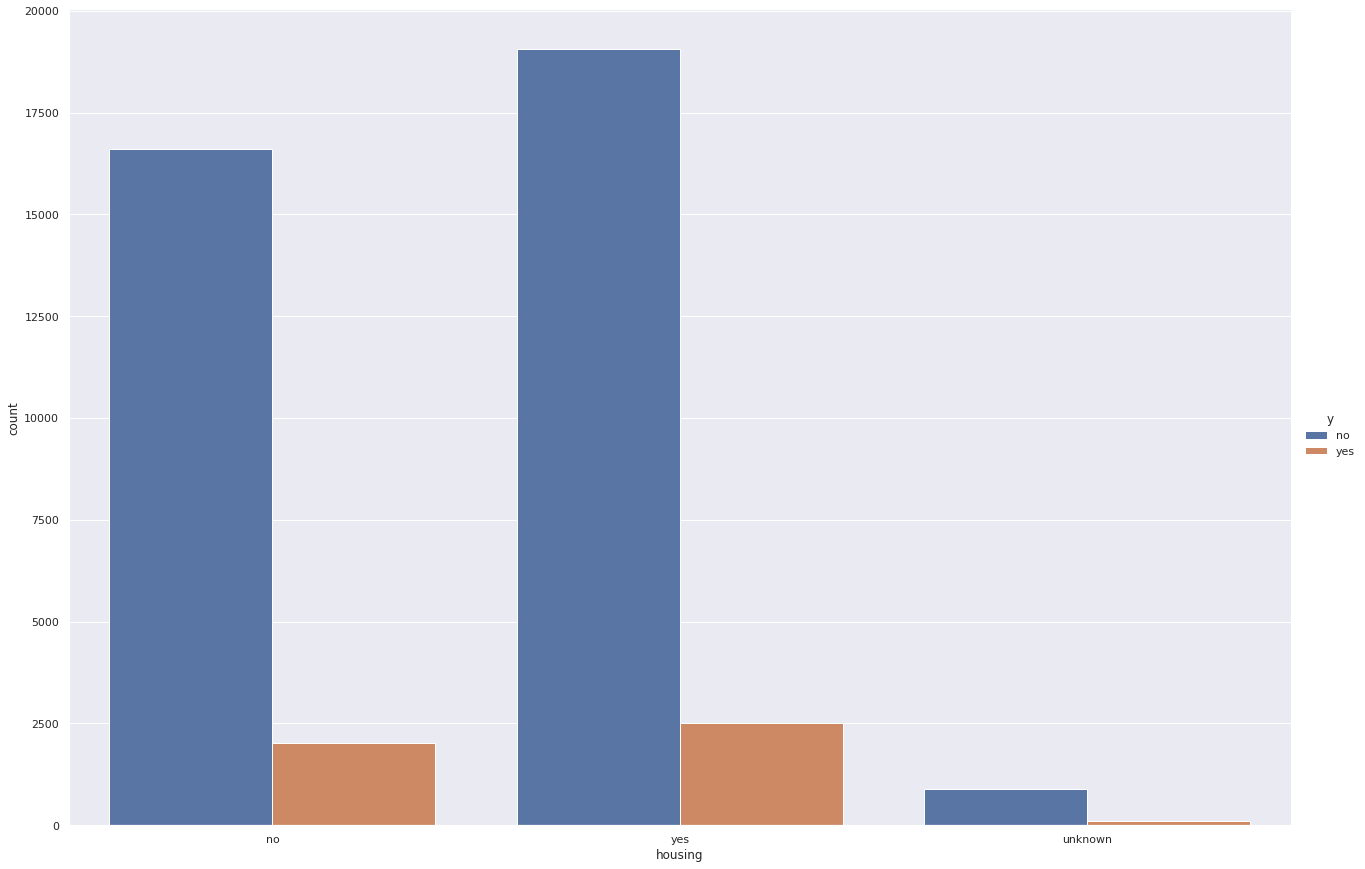

In [11]:
sns.factorplot(x="housing",hue="y",data=data,kind='count',size = 12,aspect = 1.5,legend_out=True)

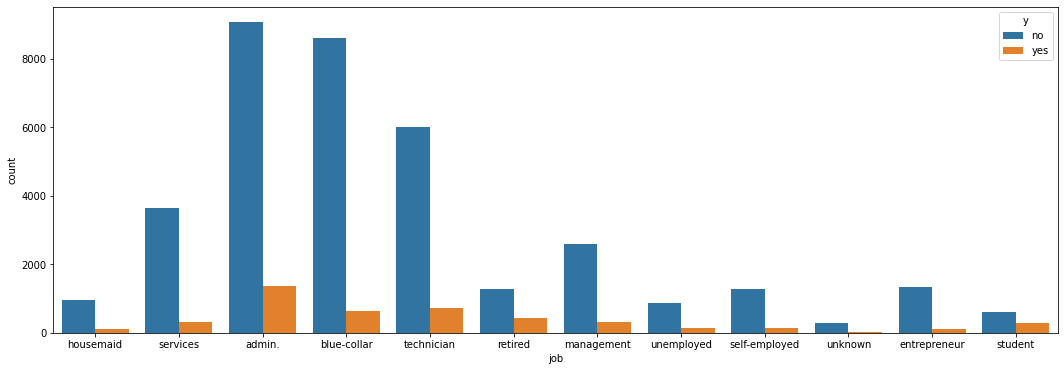

In [ ]:
sns.countplot(data=data,x=data['job'],hue='y')

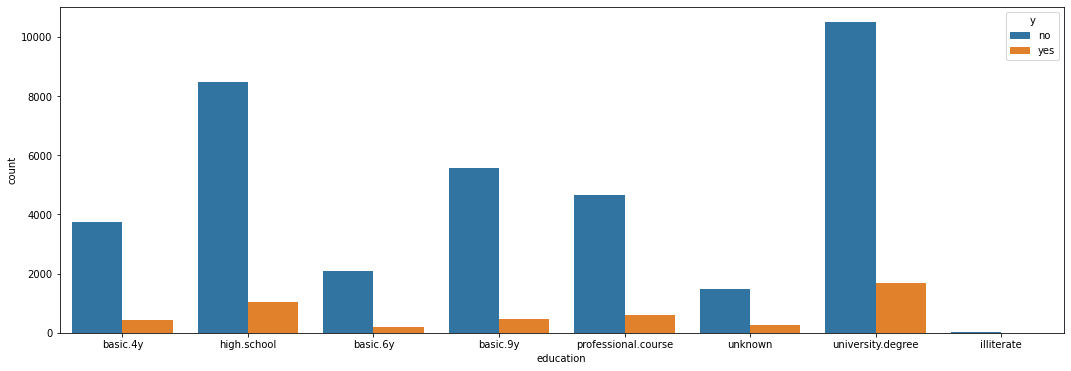

In [ ]:
sns.countplot(data=data,x=data['education'],hue='y')

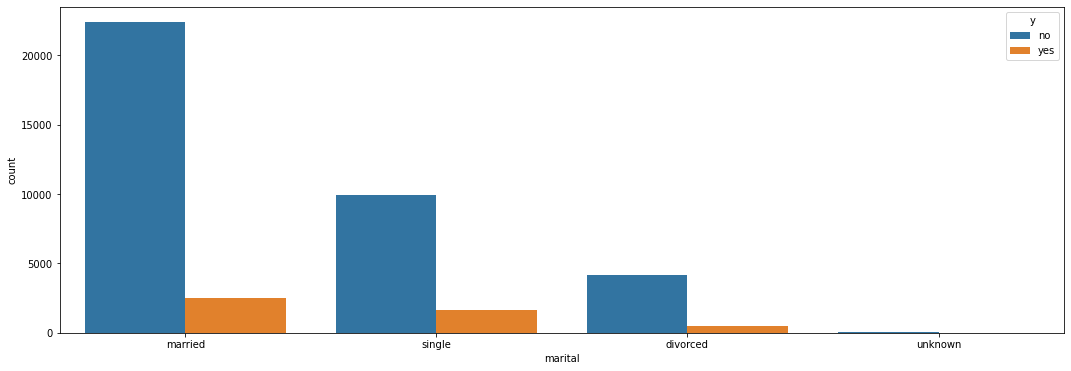

In [ ]:
sns.countplot(data=data,x=data['marital'],hue='y')

Our data is generally centered to the month of May, June, July and August

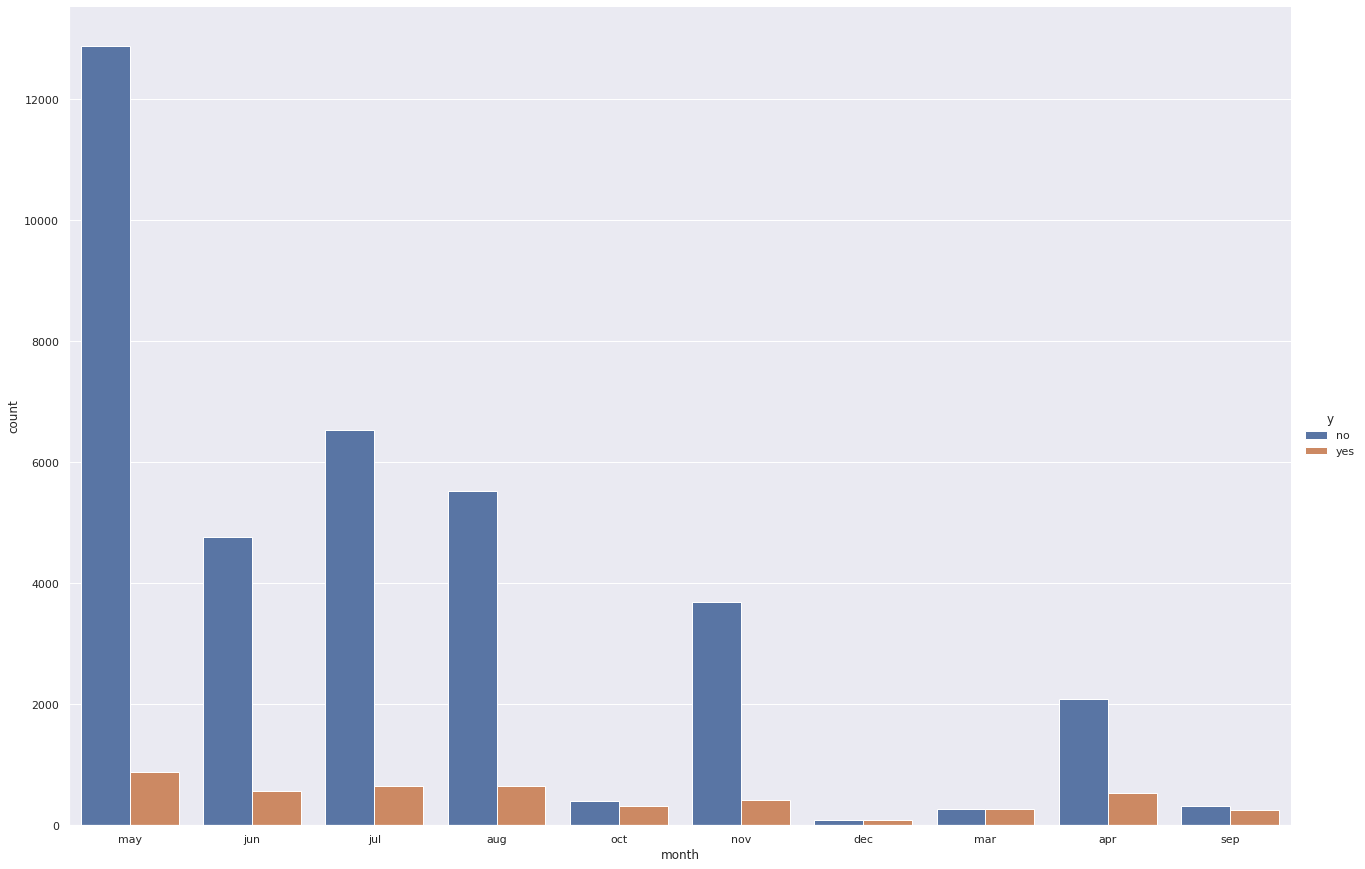

In [10]:
sns.factorplot(x="month",hue="y",data=data,kind='count',size = 12,aspect = 1.5,legend_out=True)

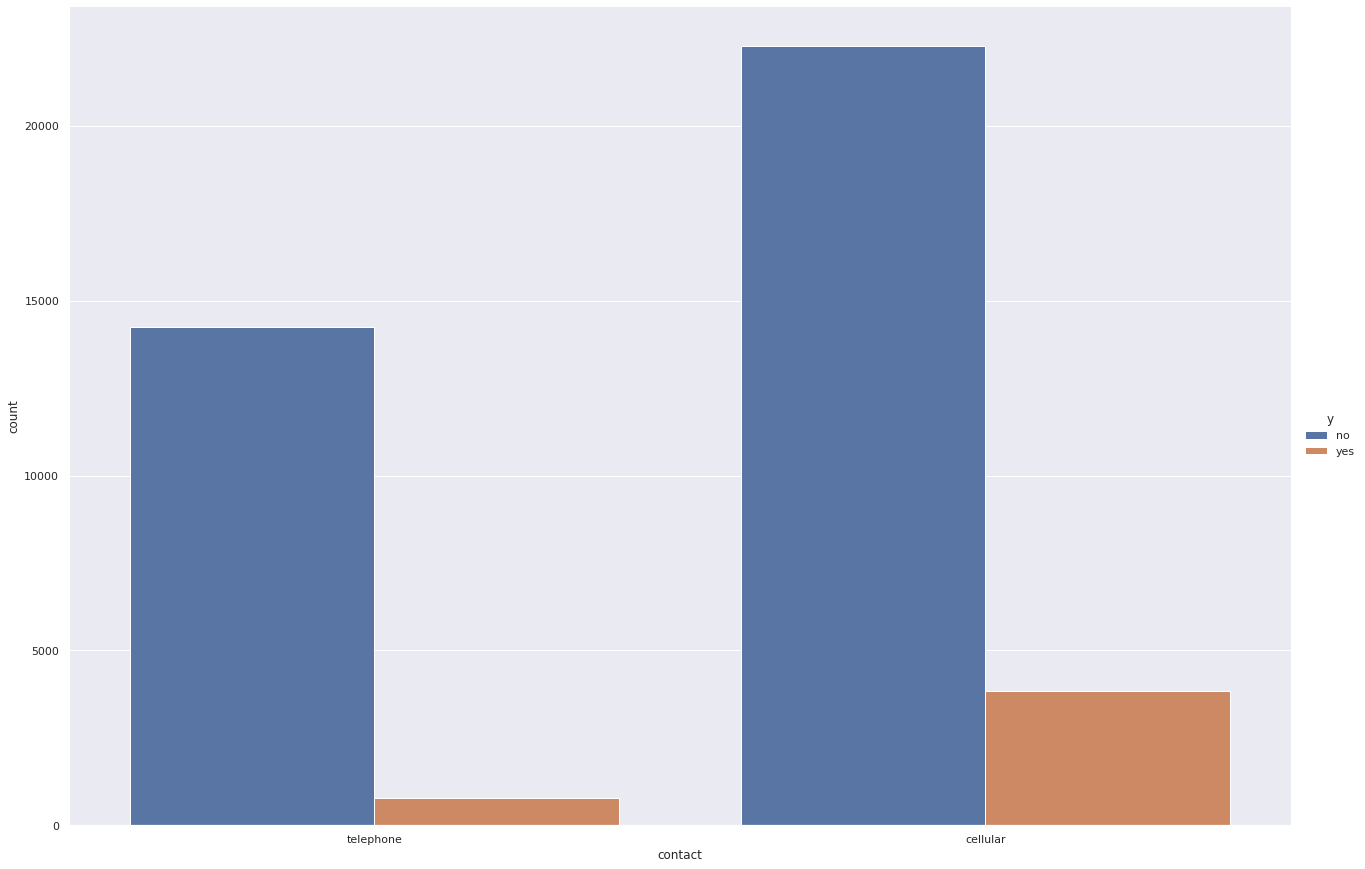

In [12]:
sns.factorplot(x="contact",hue="y",data=data,kind='count',size = 12,aspect = 1.5,legend_out=True)

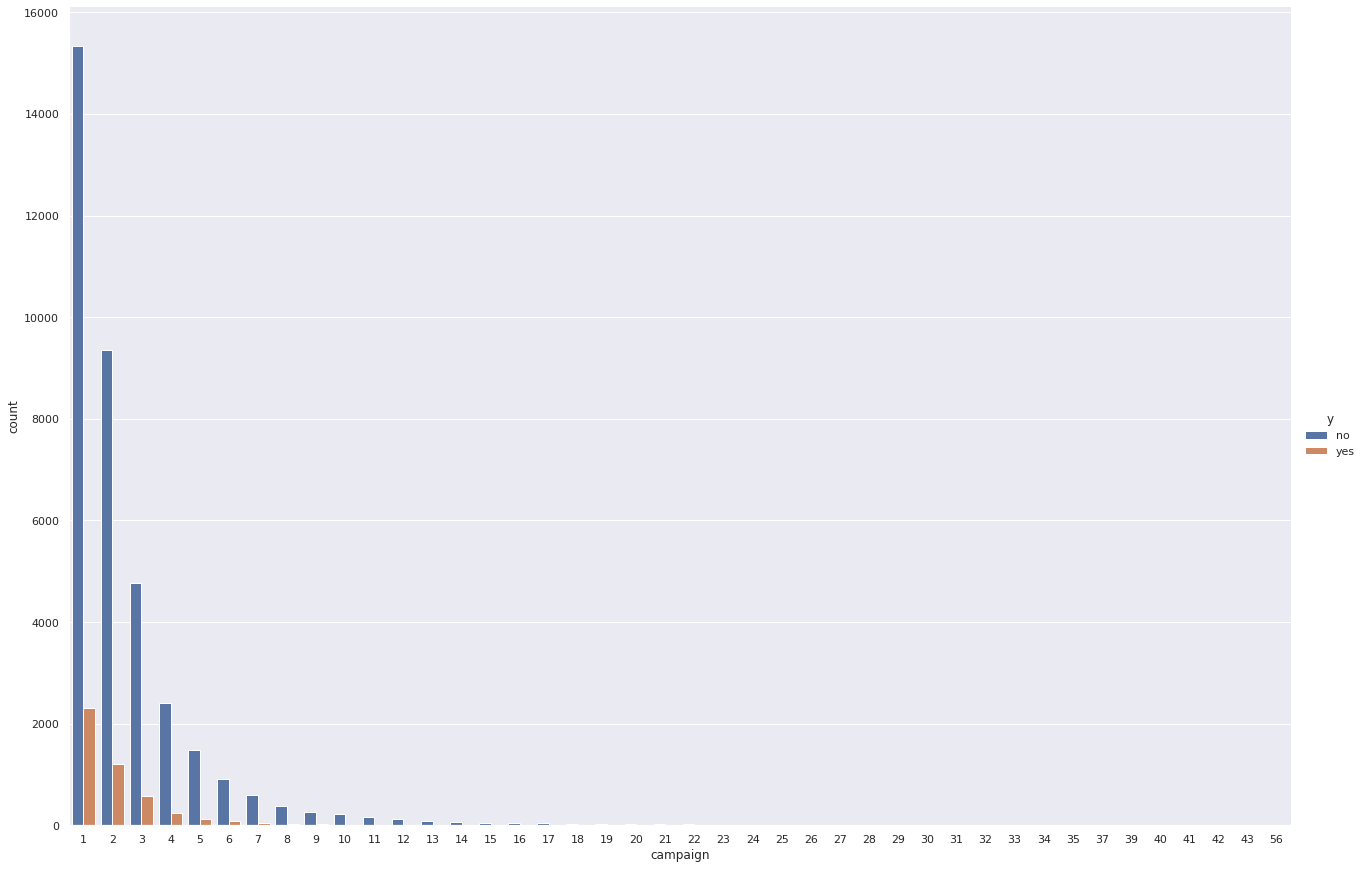

In [19]:
sns.factorplot(x="campaign",hue="y",data=data,kind='count',size = 12,aspect = 1.5,legend_out=True)

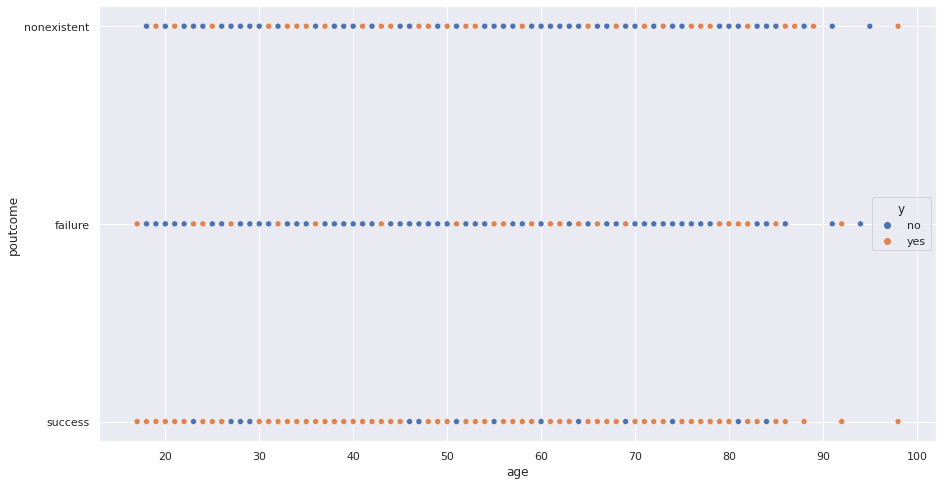

In [24]:
sns.scatterplot(x="age",y="poutcome",hue='y',data=data)

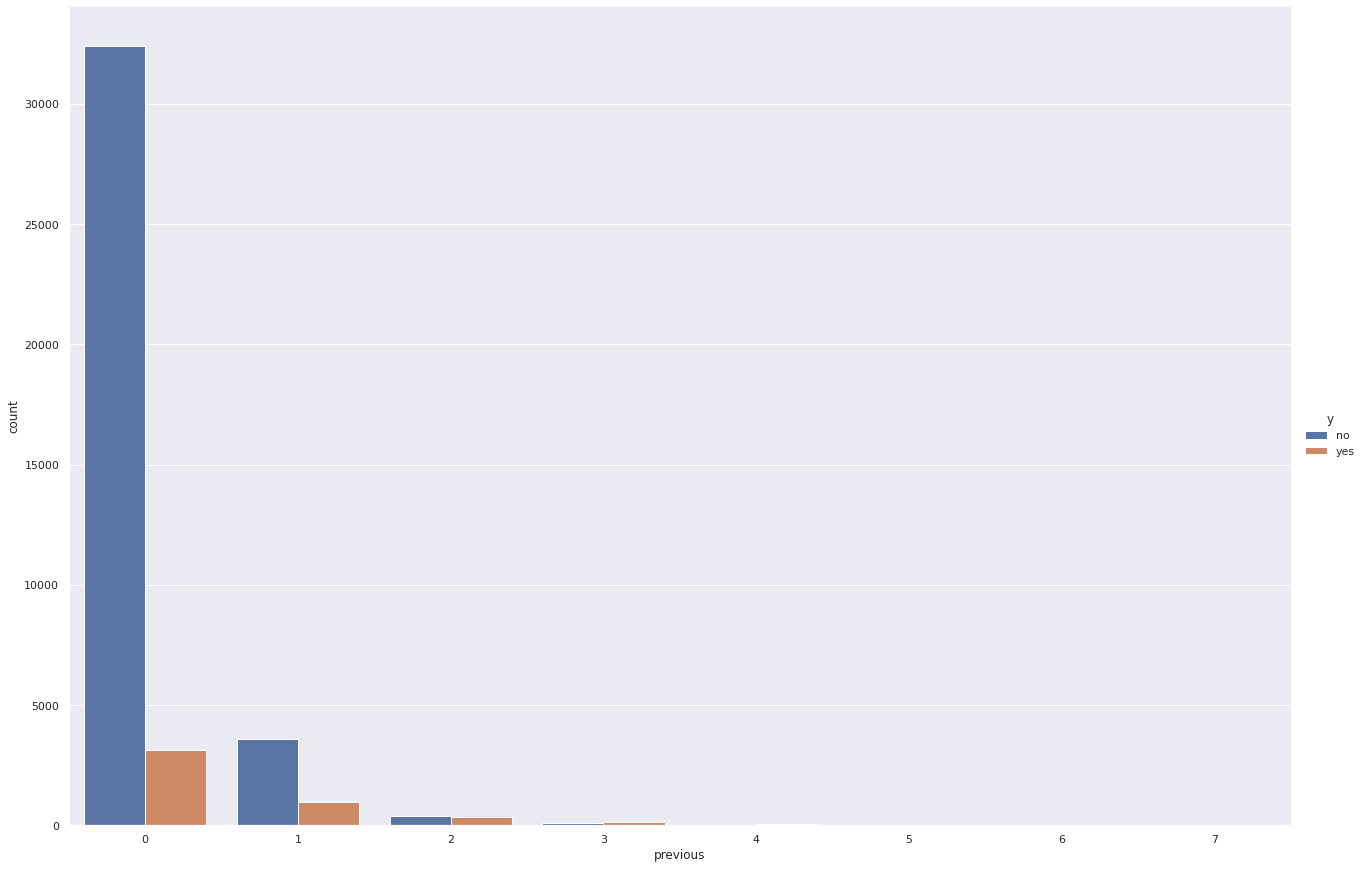

In [34]:
sns.factorplot(x='previous',hue='y',data=data,kind='count',size = 12,aspect = 1.5,legend_out=True)

Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
data["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
!pip install category_encoders
from category_encoders import BinaryEncoder  #Doing binary encoding to get optimal number of sorted cateogrical columns
encoder = BinaryEncoder()
new_data=encoder.fit_transform(data["job"]) 

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
data=pd.concat([data,new_data],axis=1)

In [ ]:
ind=data[data['marital']=='unknown'].index

In [ ]:
data.drop(ind,axis=0,inplace=True)

In [ ]:
mar=pd.get_dummies(data['marital'])

In [ ]:
data=pd.concat([data,mar],axis=1)

In [ ]:
data.drop(['marital','job'],axis=1,inplace=True)

In [ ]:
data["education"].value_counts()

university.degree      12137
high.school             9501
basic.9y                6037
professional.course     5237
basic.4y                4170
basic.6y                2286
unknown                 1722
illiterate                18
Name: education, dtype: int64

In [ ]:
a={'no':0,'yes':1,'unknown':0}
data["housing"]=data['housing'].map(a)

In [ ]:
data['default']=data['default'].map({'no':1,'unknown':0})

In [ ]:
datacopy=data

In [ ]:
data['loan']=data['loan'].map({'no':0,'yes':1,'unknown':0})


In [ ]:
enc=BinaryEncoder()
n=enc.fit_transform(data['month'])
data.drop(['month'],axis=1,inplace=True)
data=pd.concat([data,n],axis=1)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
dumm=pd.get_dummies(data['contact'])
dumm
data=pd.concat([data,dumm],axis=1)
data.drop(['contact'],axis=1,inplace=True)

In [ ]:
data['day_of_week'].value_counts()

thu    8599
mon    8495
wed    8120
tue    8079
fri    7815
Name: day_of_week, dtype: int64

In [ ]:
exc=BinaryEncoder()
ne=exc.fit_transform(data['day_of_week'])
data=pd.concat([data,ne],axis=1)
data.drop(['day_of_week'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
data['poutcome'].value_counts()

nonexistent    35501
failure         4239
success         1368
Name: poutcome, dtype: int64

In [ ]:
dumb=pd.get_dummies(data['poutcome'])
dumb

,failure,nonexistent,success
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
41183,0,1,0
41184,0,1,0
41185,0,1,0
41186,0,1,0


In [ ]:
data=pd.concat([data,dumb],axis=1)
data.drop(['poutcome'],axis=1,inplace=True)

In [ ]:
data.head()

,age,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_0,job_1,job_2,job_3,job_4,divorced,married,single,month_0,month_1,month_2,month_3,month_4,cellular,telephone,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,failure,nonexistent,success
0,56,basic.4y,1.0,0,0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
1,57,high.school,0.0,0,0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
2,37,high.school,1.0,1,0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
3,40,basic.6y,1.0,0,0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
4,56,high.school,1.0,0,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0


In [ ]:
data['y']=data['y'].map({'yes':1,'no':0})

In [ ]:
i=data[data['education']=='unknown'].index
data.drop(i,axis=0,inplace=True)

In [ ]:
data['education'].value_counts()

university.degree      12137
high.school             9501
basic.9y                6037
professional.course     5237
basic.4y                4170
basic.6y                2286
illiterate                18
Name: education, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['education']=lb.fit_transform(data['education'])

In [ ]:
data=data.dropna()

In [ ]:
data.default=data.default.astype(int)
data['nr.employed']=data['nr.employed'].astype(int)
data['euribor3m']=data['euribor3m'].astype(int)
data['cons.conf.idx']=data['cons.conf.idx'].astype(int)
data['cons.price.idx']=data['cons.price.idx'].astype(int)
data['emp.var.rate']=data['emp.var.rate'].astype(int)

In [ ]:
x=data.copy()
x.drop('y',axis=1,inplace=True)
y=data['y']

In [ ]:
 #SMOTE Analysis
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=11)
X_sm , y_sm= sm.fit_resample(x ,y)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split
#Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,random_state=14,test_size=0.3)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_sm,y_sm,random_state=42,test_size=.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrain=sc.fit_transform(Xtrain)
Xtest=sc.transform(Xtest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=70, random_state=0, n_jobs=-1)
clf.fit(Xtrain, Ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.feature_selection import SelectFromModel #Checking the most important features of dataset
sfm = SelectFromModel(clf)
sfm.fit(Xtrain, Ytrain)
feat_labels=data.columns
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

age
duration
campaign
pdays
cons.conf.idx
euribor3m
nr.employed


>Support Vector Machine Model


In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(Xtrain,Ytrain)
pred=svm.predict(Xtest)
from sklearn.metrics import accuracy_score
svc=accuracy_score(Ytest,pred)

>Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(Xtrain,Ytrain)
predy=lg.predict(Xtest)
log=accuracy_score(Ytest,predy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


>AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(Xtrain,Ytrain)
predY=ad.predict(Xtest)
ada=accuracy_score(Ytest,predY)


> Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(Xtrain,Ytrain)
prednb=gnb.predict(Xtest)
nai=accuracy_score(Ytest,prednb)

>KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Xtrain,Ytrain)
predknn=knn.predict(Xtest)
kn=accuracy_score(Ytest,predknn)

In [ ]:
score=pd.DataFrame({'Name':['Logistic Regression','SVM','KNN','AdaBoost','Naive Bayes'],'Accuracy Score':[log,svc,kn,ada,nai]})
score=score.sort_values(by=['Accuracy Score'])

In [ ]:
score # As we can see KNN gave the best result with 93.5% accuracy which is pretty good

,Name,Accuracy Score
4,Naive Bayes,0.822549
1,SVM,0.848307
0,Logistic Regression,0.891920
3,AdaBoost,0.925868
2,KNN,0.935295
